In [1]:
# %load base.py
# 기본 패키지 불러오기
import numpy as np
import pandas as pd
import warnings
import mglearn
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
%matplotlib inline

# jtplot style 설정
jtplot.style(theme='gruvboxd', grid=False)

# matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# -부호 깨지지 않게 하기
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


# 교차 검증
k-겹 교차검증은 보통 5나 10을 사용합니다.

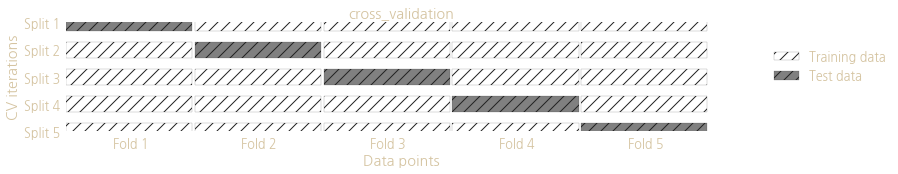

In [3]:
import mglearn
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.96078431 0.92156863 0.95833333]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('교차 검증 점수:', scores)

교차 검증 점수: [1.         0.96666667 0.93333333 0.9        1.        ]


In [6]:
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 평균 점수: 0.96


In [7]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.00099826, 0.00196886, 0.00102282, 0.00099874, 0.00205207]),
 'score_time': array([0.      , 0.      , 0.      , 0.004004, 0.      ]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [8]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.000998,0.000000,1.000000,0.950000
1,0.001969,0.000000,0.966667,0.966667
2,0.001023,0.000000,0.933333,0.966667
3,0.000999,0.004004,0.900000,0.975000
4,0.002052,0.000000,1.000000,0.958333


평균 시간과 점수:
 fit_time       0.001408
score_time     0.000801
test_score     0.960000
train_score    0.963333
dtype: float64


In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris 레이블:\n', iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


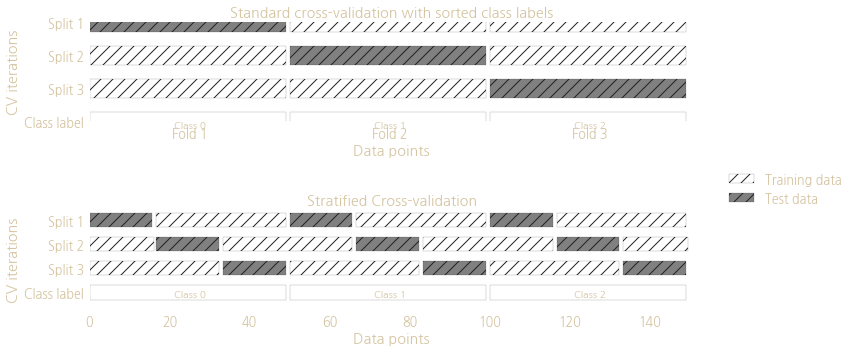

In [10]:
mglearn.plots.plot_stratified_cross_validation() # 분류 문제에서 사용한다.

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [12]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0) # 셔플을 주면 계층별 검증과 비슷해진다.
print('교차 검증 점수:\n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.9  0.96 0.96]


# LOOCV

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수:', len(scores))
print('평균 정확도: {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.95


# 임의 분할 교차 검증

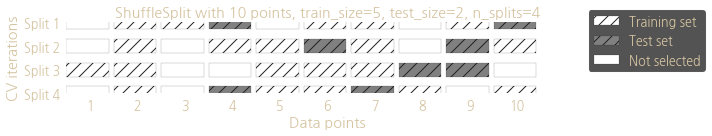

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit # 계층별 버전도 있다.
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [1.         0.97333333 0.88       0.8        0.98666667 0.96
 0.96       0.97333333 0.92       0.88      ]


# 그룹별 교차 검증

In [17]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.75       0.8        0.66666667]


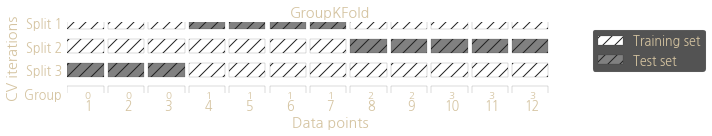

In [18]:
mglearn.plots.plot_group_kfold()

# 반복 교차 검증

In [19]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print('교차 검증 점수:\n', scores)
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

교차 검증 점수:
 [0.96666667 0.96666667 0.96666667 0.93333333 0.96666667 0.86666667
 0.96666667 0.96666667 0.93333333 0.96666667 1.         1.
 0.93333333 0.93333333 0.93333333 1.         0.96666667 0.96666667
 0.9        0.96666667 0.96666667 0.96666667 1.         0.9
 0.96666667 0.93333333 1.         0.96666667 0.96666667 0.93333333
 0.96666667 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.93333333 0.93333333 0.96666667 1.         0.96666667 0.96666667
 0.86666667 1.         0.93333333 1.         0.96666667 1.
 0.93333333 0.9       ]
교차 검증 평균 점수: 0.957


# 그리드 서치

In [21]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('훈련 세트의 크기: {} 테스트 세트의 크기: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print('최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수:', best_parameters)

훈련 세트의 크기: 112 테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


# 매개변수 과대적합과 검증 세트

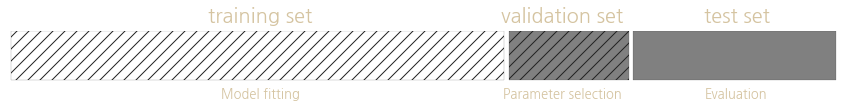

In [22]:
mglearn.plots.plot_threefold_split()

In [23]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기: {} 검증 세트의 크기: {} 테스트 세트의 크기: {}\n'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('검증 세트에서 최고 점수: {:.2f}'.format(best_score))
print('최적 매개변수:', best_parameters)
print('최적 매개변수에서 테스트 세트 점수: {:.2f}'.format(test_score))

훈련 세트의 크기: 84 검증 세트의 크기: 28 테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92


# 교차 검증을 사용한 그리드 서치

In [24]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

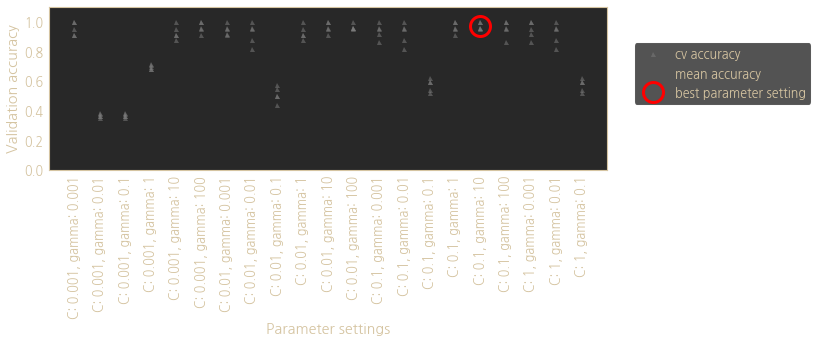

In [25]:
mglearn.plots.plot_cross_val_selection()

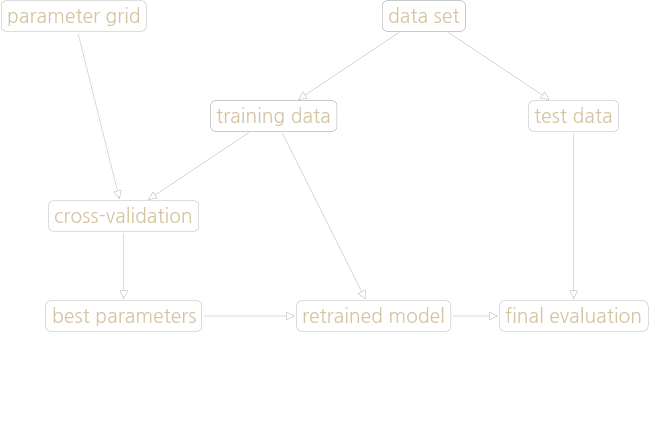

In [26]:
mglearn.plots.plot_grid_search_overview()

In [27]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드:\n', param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [31]:
print('테스트 세트 점수: {:.2f}'.format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [32]:
print('최적 매개변수:', grid_search.best_params_)
print('최고 교차 검증 점수: {:.2f}'.format(grid_search.best_score_))

최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수: 0.97


In [33]:
print('최고 성능 모델:\n', grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# 교차 검증 결과 분석

In [34]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000803566,0.000795269,0.000585604,0.000593424,0.000804329
std_fit_time,0.000402101,0.00074037,0.000478207,0.000484626,0.000745605
mean_score_time,0.000994587,0.000206566,0.000608015,0,0.000396299
std_score_time,0.00109656,0.000413132,0.000807289,0,0.000485399
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.375,0.375,0.375,0.375,0.375
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


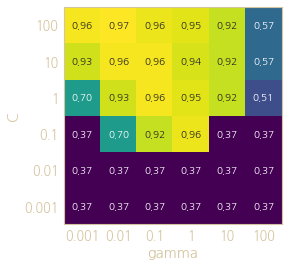

In [35]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

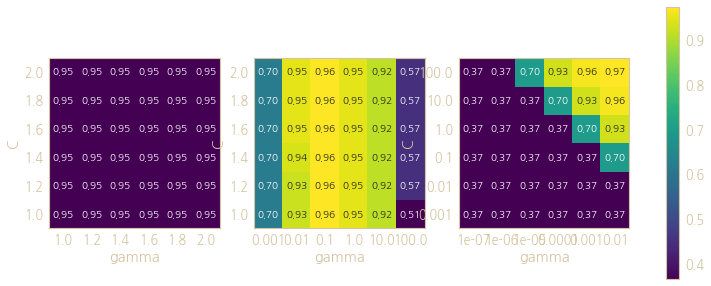

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                   'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis', ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

# 비대칭 매개변수 그리드 탐색
커널에 따라 받는 매개변수가 다를 경우 사용한다. (rbf는 감마와 c를 둘 다 받고, linear는 c만 받는다)

In [37]:
param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print('그리드 목록:\n', param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [38]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print('최적 파라미터:', grid_search.best_params_)
print('최고 교차 검증 점수: {:.2f}'.format(grid_search.best_score_))

최적 파라미터: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [39]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000806,0.000405,0.000391,0.000479,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000593,0.000484,0.000197,0.000394,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.001403,0.000990,0.000774,0.000716,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000599,0.000489,0.000000,0.000000,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000794,0.000397,0.000196,0.000392,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
5,0.000798,0.000399,0.000199,0.000399,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
6,0.000993,0.000007,0.000404,0.000495,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
7,0.000993,0.000624,0.000200,0.000401,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
8,0.000592,0.000484,0.000201,0.000402,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
9,0.000598,0.000488,0.000399,0.000489,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.375000,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,27,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


# 중첩 교차 검증
중첩 교차 검증은 미래의 데이터에 적용하기 위한 예측 모델을 찾는 데는 거의 사용하지 않고, 얼마나 잘 일반화 하는지 평가하는 데 사용한다.

In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 평균 점수:', scores.mean())
print(param_grid)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [41]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_train], y[inner_train])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [42]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수:', scores)

교차 검증 점수: [1.         0.9        0.86666667 0.96666667 0.96666667]


# 불균형 데이터셋

In [43]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [44]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 유니크 레이블:', np.unique(pred_most_frequent))
print('테스트 점수: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.90


In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수: {:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [46]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수: 0.82
logreg 점수: 0.98


## 오차 행렬

In [47]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[401   2]
 [  8  39]]


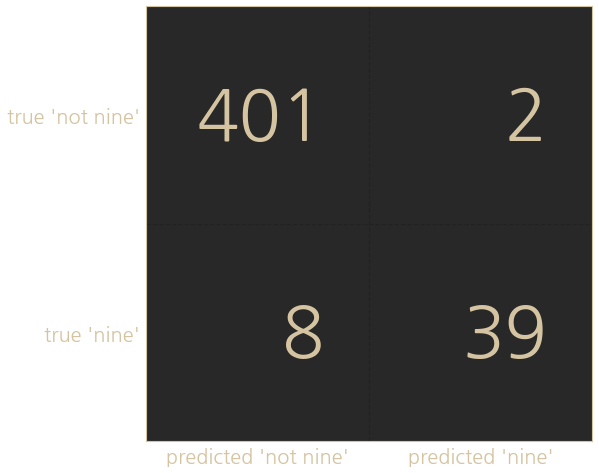

In [48]:
mglearn.plots.plot_confusion_matrix_illustration()

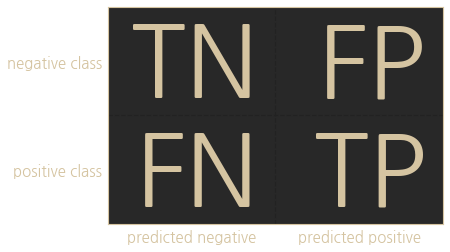

In [49]:
mglearn.plots.plot_binary_confusion_matrix()

In [50]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델:')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리:')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀:')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[365  38]
 [ 44   3]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[401   2]
 [  8  39]]


In [51]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1_score: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1_score: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('트리 모델의 f1_score: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1_score: {:.2f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1_score: 0.00
무작위 더미 모델의 f1_score: 0.07
트리 모델의 f1_score: 0.55
로지스틱 회귀 모델의 f1_score: 0.89


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [53]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.89      0.91      0.90       403
           9       0.07      0.06      0.07        47

    accuracy                           0.82       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.82      0.81       450



In [54]:
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



## 불확실성 고려

In [55]:
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

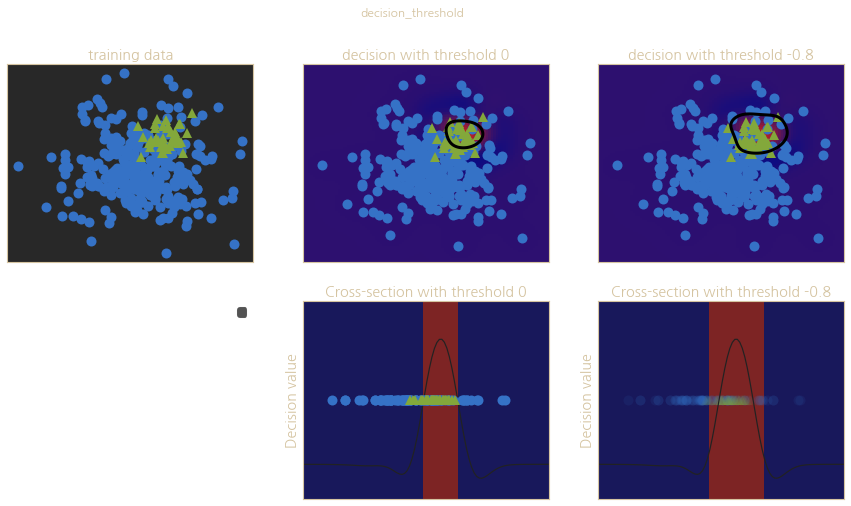

In [56]:
import mglearn
mglearn.plots.plot_decision_threshold()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [58]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [59]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



## 정밀도-재현율 곡선과 ROC 곡선

In [60]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

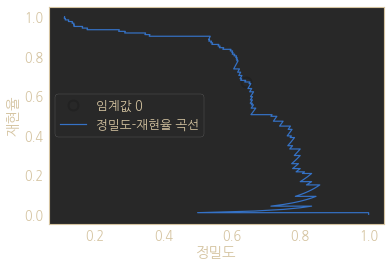

In [61]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(threshold))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

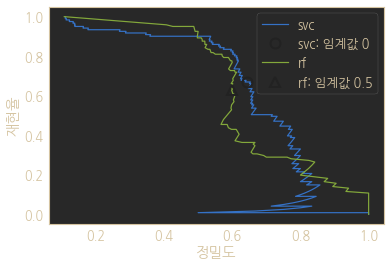

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='svc: 임계값 0', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10,
         label='rf: 임계값 0.5', fillstyle='none', mew=2)
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

In [63]:
print('랜덤 포레스트의 f1_score: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('svm의 f1_score: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svm의 f1_score: 0.656


In [64]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 평균 정밀도; {:.3f}'.format(ap_rf))
print('svm의 평균 정밀도: {:.3f}'.format(ap_svc))

랜덤 포레스트의 평균 정밀도; 0.660
svm의 평균 정밀도: 0.666


## ROC와 AUC

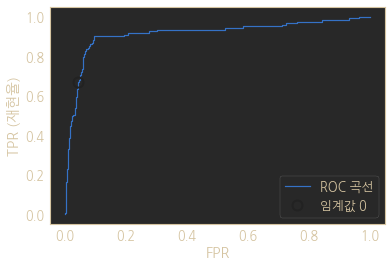

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend()

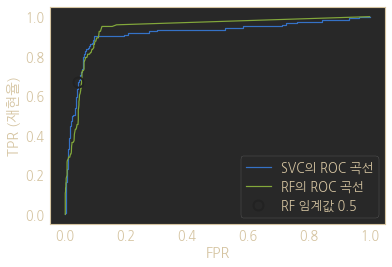

In [66]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='SVC의 ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='RF의 ROC 곡선')

plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='RF 임계값 0.5', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [67]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('랜덤 포레스트의 AUC: {:.3f}'.format(rf_auc))
print('SVC의 AUC: {:.3f}'.format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00 정확도= 0.90 AUC= 0.50
gamma = 0.10 정확도= 0.90 AUC= 0.96
gamma = 0.01 정확도= 0.90 AUC= 1.00


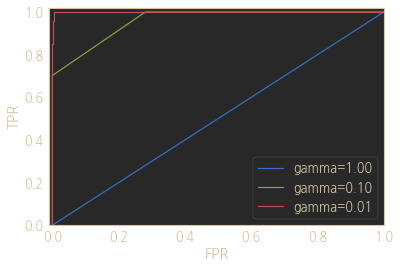

In [68]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} 정확도= {:.2f} AUC= {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

# 다중 분류의 평가 지표

In [69]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print('정확도: {:.3f}'.format(accuracy_score(y_test, pred)))
print('오차 행렬:\n', confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


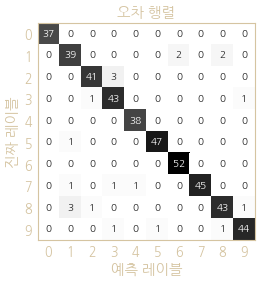

In [70]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='예측 레이블', ylabel='진짜 레이블',
                                     xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, 
                                    fmt = '%d')
plt.title('오차 행렬')
plt.gca().invert_yaxis()

In [71]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [72]:
print('micro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('macro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


회귀 모델에서는 r^2 스코어를 쓰면 된다.

# 모델 선택에서 평가 지표 사용하기

In [73]:
print('기본 평가 지표:', cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy', cv=5)
print('정확도 지표:', explicit_accuracy)
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc', cv=5)
print('평균 정밀도 지표:', roc_auc)

기본 평가 지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
정확도 지표: [0.9        0.9        0.89972145 0.89972145 0.89972145]
평균 정밀도 지표: [0.99674211 0.99725652 0.99552804 0.99836601 0.99165807]


In [74]:
res = cross_validate(SVC(), digits.data, digits.target == 9, scoring=['accuracy', 'roc_auc', 'recall_macro'],
                    return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.201486,0.113706,0.900000,1.0,0.996742,1.0,0.5,1.0
1,0.215456,0.133619,0.900000,1.0,0.997257,1.0,0.5,1.0
2,0.218416,0.134676,0.899721,1.0,0.995528,1.0,0.5,1.0
3,0.212373,0.137635,0.899721,1.0,0.998366,1.0,0.5,1.0
4,0.215421,0.132672,0.899721,1.0,0.991658,1.0,0.5,1.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print('정확도 지표를 사용한 그리드 서치')
print('최적의 파라미터:', grid.best_params_)
print('최상의 교차 검증 점수(정확도): {:.3f}'.format(grid.best_score_))
print('테스트 세트 평균 정밀도: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('테스트 세트 정확도: {:.3f}'.format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.001}
최상의 교차 검증 점수(정확도): 0.996
테스트 세트 평균 정밀도: 1.000
테스트 세트 정확도: 0.991


In [76]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc', cv=3)
grid.fit(X_train, y_train)
print('평균 정밀도 지표를 사용한 그리드 서치')
print('최적의 파라미터:', grid.best_params_)
print('최상의 교차 검증 점수(평균 정밀도): {:.3f}'.format(grid.best_score_))
print('테스트 세트 평균 정밀도: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('테스트 세트 정확도: {:.3f}'.format(grid.score(X_test, y_test)))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.001}
최상의 교차 검증 점수(평균 정밀도): 0.998
테스트 세트 평균 정밀도: 1.000
테스트 세트 정확도: 1.000


scoring 매개변수 정리  
분류 : accuracy(기본값), roc_auc, average_precision, f1, f1_macro, f1_micro, f1_weighted  
회귀 : r2, mean_squared_error, mean_absolute_error

In [77]:
from sklearn.metrics.scorer import SCORERS
print('가능한 평가 방식:\n', sorted(SCORERS.keys()))

가능한 평가 방식:
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


# 요약 및 정리
1. 교차 검증을 해야 한다.
2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.